## Running LogisticRegression and SVC

logistic regression and a support vector machine to classify images of handwritten digits.


In [9]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# Apply logistic regression and print scores
lr = LogisticRegression(max_iter=7600)
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

# Apply SVM and print scores
svm = SVC(kernel='linear')
# svm = SVC()
svm.fit(X_train, y_train)
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

1.0
0.9622222222222222
1.0
0.9888888888888889




## Sentiment analysis for movie reviews

In this exercise you'll explore the probabilities outputted by logistic regression on a subset of the Large Movie Review Dataset.http://ai.stanford.edu/~amaas/data/sentiment/

The variables X and y are already loaded into the environment. X contains features based on the number of times words appear in the movie reviews, and y contains labels for whether the review sentiment is positive (+1) or negative (-1).

In [ ]:
# Instantiate logistic regression and train
lr = LogisticRegression()
lr.fit(X, y)

# Predict sentiment for a glowing review
review1 = "LOVED IT! This movie was amazing. Top 10 this year."
review1_features = get_features(review1)
print("Review:", review1)
print("Probability of positive review:", lr.predict_proba(review1_features)[0,1])

# Predict sentiment for a poor review
review2 = "Total junk! I'll never watch a film by that director again, no matter how good the reviews."
review2_features = get_features(review2)
print("Review:", review2)
print("Probability of positive review:", lr.predict_proba(review2_features)[0,1])

In [ ]:

<script.py> output:
    Review: LOVED IT! This movie was amazing. Top 10 this year.
    Probability of positive review: 0.8079007873616059
    Review: Total junk! I'll never watch a film by that director again, no matter how good the reviews.
    Probability of positive review: 0.5855117402793947


The second probability would have been even lower, but the word "good" trips it up a bit, since that's considered a "positive" word.

## Visualizing decision boundaries

In this exercise, you'll visualize the decision boundaries of various classifier types.

A subset of scikit-learn's built-in wine dataset is already loaded into X, along with binary labels in y.

    ## inspect the def function
    In [1]: import inspect
... ... print(inspect.getsource(plot_4_classifiers))
def plot_4_classifiers(X, y, clfs):

    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

    for clf, ax, title in zip(clfs, sub.flatten(), ("(1)", "(2)", "(3)", "(4)")):
        # clf.fit(X, y)
        plot_classifier(X, y, clf, ax, ticks=True)
        ax.set_title(title)
    plt.show()


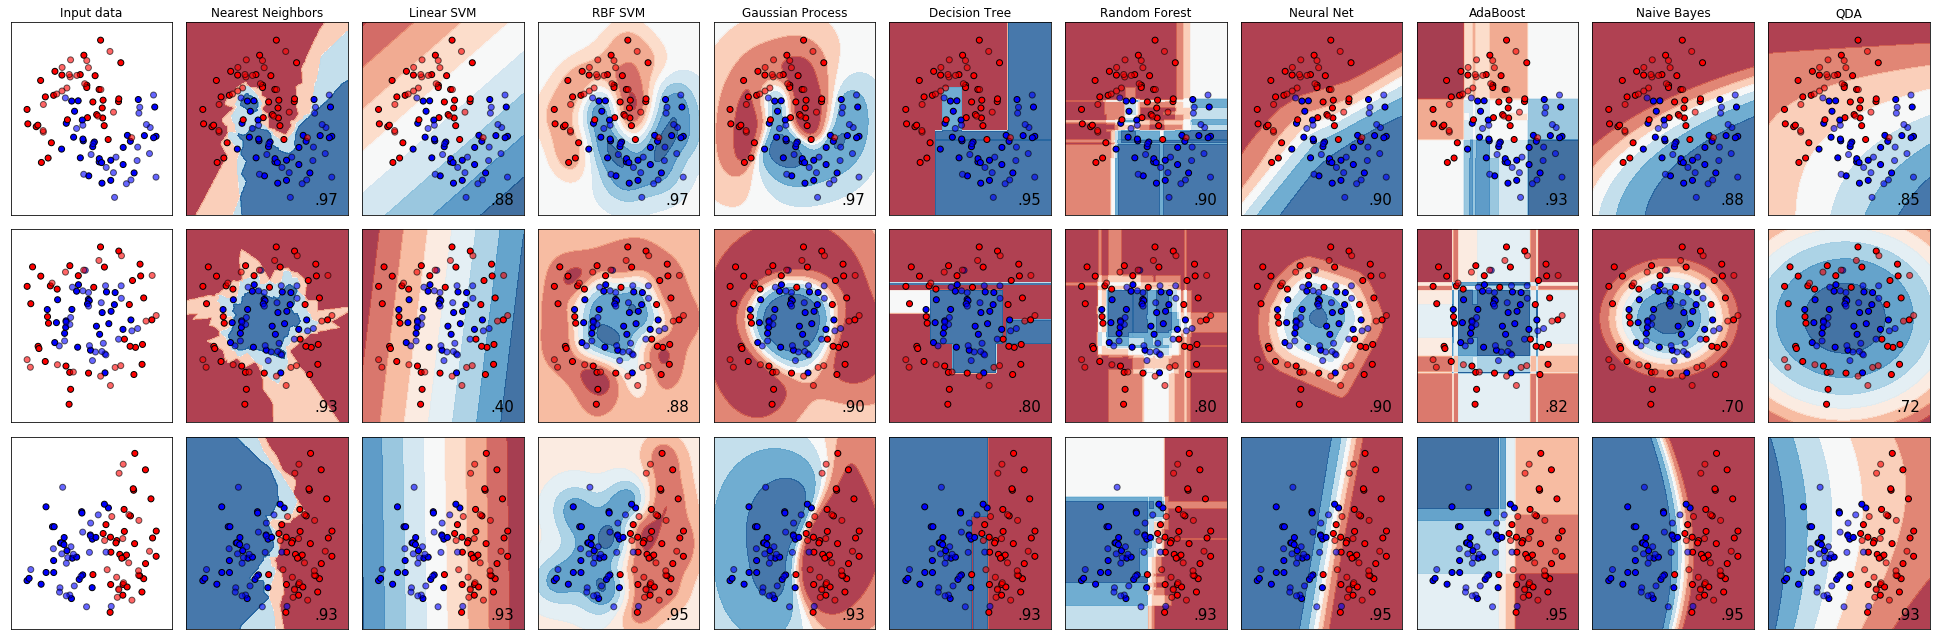

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

In [28]:
# adapted from http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
import numpy as np
import matplotlib.pyplot as plt

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in
    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional
    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, proba=False, transformation=None, **params):
    """Plot the decision boundaries for a classifier.
    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """

    X = np.c_[xx.ravel(), yy.ravel()]
    if transformation is not None:
        X = transformation(X)
        # xx = np.reshape(X[:,0], xx.shape)
        # yy = np.reshape(X[:,1], yy.shape)


    if proba:
        if hasattr(clf, 'predict_proba'):
            Z = clf.predict_proba(X)[:,-1]
            Z = Z.reshape(xx.shape)
            out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), origin='lower', vmin=0, vmax=1, **params)
            ax.contour(xx, yy, Z, levels=[0.5])
        else:
            Z = clf.decision_function(X)
            Z = Z.reshape(xx.shape)
            out = ax.contourf(xx, yy, Z, **params)
    else:
        Z = clf.predict(X)
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out

# adapted from http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, transformation=None): # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False

    # can abstract some of this into a higher-level function for learners to call
    plot_contours(ax, clf, xx, yy, proba=proba, transformation=transformation, cmap=plt.cm.coolwarm, alpha=0.8)
    #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
#     ax.set_xlabel(data.feature_names[0])
#     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
#     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax

def plot_4_classifiers(X, y, clfs):

    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

    for clf, ax, title in zip(clfs, sub.flatten(), ("(1)", "(2)", "(3)", "(4)")):
        # clf.fit(X, y)
        plot_classifier(X, y, clf, ax, ticks=True)
        ax.set_title(title)
    plt.show()


In [16]:
import pandas as pd
wine = pd.read_csv('data_folder/wine.csv')
wine.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [36]:
# import numpy as np

X_list = [[11.45, 2.4], [13.62, 4.95], [13.88, 1.89], [12.42, 2.55], [12.81, 2.31], [12.58, 1.29], [13.83, 1.57], [13.07, 1.5], [12.7, 3.55], [13.77, 1.9], [12.84, 2.96], [12.37, 1.63], [13.51, 1.8], [13.87, 1.9], [12.08, 1.39], [13.58, 1.66], [13.08, 3.9], [11.79, 2.13], [12.45, 3.03], [13.68, 1.83], [13.52, 3.17], [13.5, 3.12], [12.87, 4.61], [14.02, 1.68], [12.29, 3.17], [12.08, 1.13], [12.7, 3.87], [11.03, 1.51], [13.32, 3.24], [14.13, 4.1], [13.49, 1.66], [11.84, 2.89], [13.05, 2.05], [12.72, 1.81], [12.82, 3.37], [13.4, 4.6], [14.22, 3.99], [13.72, 1.43], [12.93, 2.81], [11.64, 2.06], [12.29, 1.61], [11.65, 1.67], [13.28, 1.64], [12.93, 3.8], [13.86, 1.35], [11.82, 1.72], [12.37, 1.17], [12.42, 1.61], [13.9, 1.68], [14.16, 2.51]]

# print((y.reshape(-1,1)).tolist()) make 1D array to 2D array and change to list
y_list = [[True], [True], [False], [True], [True], [True], [False], [False], [True], [False], [True], [True], [False], [False], [True], [False], [True], [True], [True], [False], [True], [True], [True], [False], [True], [True], [True], [True], [True], [True], [True], [True], [False], [True], [True], [True], [False], [False], [True], [True], [True], [True], [False], [False], [False], [True], [True], [True], [False], [True]]

X = np.array(X_list)
y1D = np.array(y_list)
print(type(X))
print(type(y1D))
print(X.shape)
print(y1D.shape)
# y1D == y
#need y flatten Using np.flatten()  or    Using np.reshape() 
y_test_reshape = y1D.reshape([50,1])
print(y_test_reshape)
print(y_test_reshape.shape)

y = y1D.flatten()
print(y)
print(y.shape)



<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(50, 2)
(50, 1)
[[ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]]
(50, 1)
[ True  True False  True  True  True False False  True False  True  True
 False False  True False  True  True  True False  True  True  True False
  True  True  True  True  True  True  True  True False  True  True  True
 False False  True  True  True  True False False False  True  True  True
 False  True]
(50,)


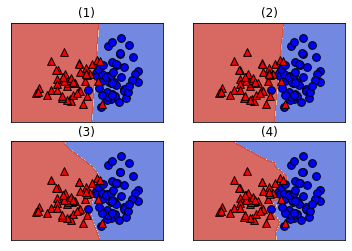

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Define the classifiers
classifiers = [LogisticRegression(),LinearSVC(), SVC(), KNeighborsClassifier()]

# Fit the classifiers
for c in classifiers:
    c.fit(X, y)

# Plot the classifiers

def plot_4_classifiers(X, y, clfs):

    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

    for clf, ax, title in zip(clfs, sub.flatten(), ("(1)", "(2)", "(3)", "(4)")):
        # clf.fit(X, y)
        plot_classifier(X, y, clf, ax, ticks=True)
        ax.set_title(title)
    plt.show()

plot_4_classifiers(X, y, classifiers)
plt.show()

 logistic regression and linear SVM are linear classifiers whereas the default SVM and KNN are not.


## Logistic regression



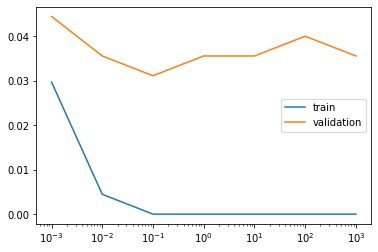

In [54]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

digits = datasets.load_digits()
X_train, X_valid, y_train, y_valid = train_test_split(digits.data, digits.target)


# Train and validaton errors initialized as empty list
train_errs = list()
valid_errs = list()

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Loop over values of C_value
for C_value in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(max_iter= 7600, C=C_value)
    lr.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr.score(X_train, y_train) )
    valid_errs.append( 1.0 - lr.score(X_valid, y_valid) )
    
# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(("train", "validation"))
plt.show()


too much regularization (small C) doesn't work well - due to underfitting - and too little regularization (large C) doesn't work well either - due to overfitting.

## Logistic regression and feature selection

In [58]:
from sklearn.model_selection import GridSearchCV

# Specify L1 regularization
lr = LogisticRegression(max_iter= 7600, penalty='l1', solver='liblinear')

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

Best CV params {'C': 0.1}
Total number of features: 640
Number of selected features: 252


<script.py> output:
    Best CV params {'C': 1}
    Total number of features: 2500
    Number of selected features: 1220


a whole lot of features were discarded here.

## Identifying the most positive and negative words

In this exercise we'll try to interpret the coefficients of a logistic regression fit on the movie review sentiment dataset. The model object is already instantiated and fit for you in the variable lr.

In addition, the words corresponding to the different features are loaded into the variable vocab. For example, since vocab[100] is "think", that means feature 100 corresponds to the number of times the word "think" appeared in that movie review.

In [ ]:
# Get the indices of the sorted cofficients
inds_ascending = np.argsort(lr.coef_.flatten()) 
inds_descending = inds_ascending[::-1]

# Print the most positive words
print("Most positive words: ", end="")
for i in range(5):
    print(vocab[inds_descending[i]], end=", ")
print("\n")

# Print most negative words
print("Most negative words: ", end="")
for i in range(5):
    print(vocab[inds_ascending[i]], end=", ")
print("\n")

<script.py> output:
    Most positive words: favorite, superb, noir, knowing, loved, 
    
    Most negative words: disappointing, waste, worst, boring, lame,



## Visualizing easy and difficult examples


In [ ]:
lr = LogisticRegression()
lr.fit(X,y)

# Get predicted probabilities
proba = lr.predict_proba(X)

# Sort the example indices by their maximum probability
proba_inds = np.argsort(np.max(proba,axis=1))

# Show the most confident (least ambiguous) digit
show_digit(proba_inds[-1], lr)

# Show the least confident (most ambiguous) digit
show_digit(proba_inds[0], lr)

As you can see, the least confident example looks like a weird 4, and the most confident example looks like a very typical 0.

## Fitting multi-class logistic regression

fit the two types of multi-class logistic regression, one-vs-rest and softmax/multinomial, on the handwritten digits data set and compare the results. 

In [9]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)


# Fit one-vs-rest logistic regression classifier
lr_ovr = LogisticRegression(max_iter =7000)
lr_ovr.fit(X_train, y_train)

print("OVR training accuracy:", lr_ovr.score(X_train, y_train))
print("OVR test accuracy    :", lr_ovr.score(X_test, y_test))

# Fit softmax classifier
lr_mn = LogisticRegression(max_iter =700000, multi_class= 'multinomial', solver='lbfgs')
lr_mn.fit(X_train, y_train)

print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("Softmax test accuracy    :", lr_mn.score(X_test, y_test))

OVR training accuracy: 1.0
OVR test accuracy    : 0.9555555555555556
Softmax training accuracy: 1.0
Softmax test accuracy    : 0.9555555555555556


<script.py> output:
    OVR training accuracy: 0.9948032665181886
    OVR test accuracy    : 0.9644444444444444
    Softmax training accuracy: 1.0
    Softmax test accuracy    : 0.9688888888888889


## Visualizing multi-class logistic regression

In [36]:
def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False

    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
    #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
#     ax.set_xlabel(data.feature_names[0])
#     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
#     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax


Softmax     training accuracy: 1.0
One-vs-rest training accuracy: 1.0


ValueError: X has 2 features per sample; expecting 64

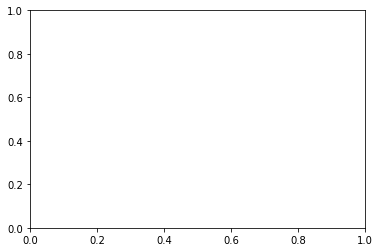

In [38]:
# Print training accuracies
print("Softmax     training accuracy:", lr_mn.score(X_train, y_train))
print("One-vs-rest training accuracy:", lr_ovr.score(X_train, y_train))

# Create the binary classifier (class 1 vs. rest)
lr_class_1 = LogisticRegression(max_iter=7600, C=100)
lr_class_1.fit(X_train, y_train==1)

# Plot the binary classifier (class 1 vs. rest)
plot_classifier(X_train, y_train==1, lr_class_1, lims=(11,15,0,6))

link C:\Users\t_tan\Documents\DataScienceFolder\datacamp\LinearClassifiersinPython
        
        

the binary classifier incorrectly labels almost all points in class 1 (shown as red triangles in the final plot)! Thus, this classifier is not a very effective component of the one-vs-rest classifier. In general, though, one-vs-rest often works well




## Support Vector Machines


Support vector: a training example notin the at part ofthe loss
diagram
Support vector: an example that is incorrectly classied or close to
the boundary
If an example is not a support vector, removing it has no effect on
the model
Having a small number of support vectors makes kernel SVMs
really fast

## Effect of removing examples
Support vectors are defined as training examples that influence the decision boundary. In this exercise, you'll observe this behavior by removing non support vectors from the training set.

The wine quality dataset is already loaded into X and y (first two features only). (Note: we specify lims in plot_classifier() so that the two plots are forced to use the same axis limits and can be compared directly.)

In [23]:
import pandas as pd

wine= pd.read_csv('data_folder/wine.csv')
print(wine.shape)
wine.head()

(178, 15)


,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [24]:
# In [3]: X.shape Out[3]: (178, 2)
X = wine[['alcohol', 'malic_acid']].values
X.shape

(178, 2)

In [25]:
# In [6]: y.shape Out[6]: (178,)
y = wine['class_label'].values
y.shape

(178,)

In [34]:
def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False

    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
    #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
#     ax.set_xlabel(data.feature_names[0])
#     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
#     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax


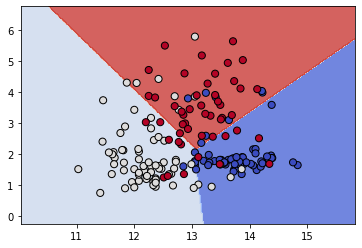

Number of original examples 178
Number of support vectors 81


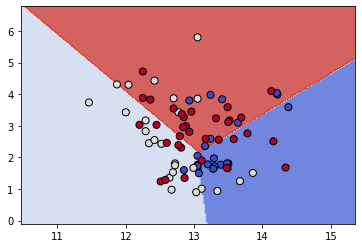

In [35]:
# Train a linear SVM
svm = SVC(kernel="linear")
svm.fit(X,y)
plot_classifier(X, y, svm, lims=(11,15,0,6))

# Make a new data set keeping only the support vectors
print("Number of original examples", len(X))
print("Number of support vectors", len(svm.support_))
X_small = X[svm.support_]
y_small = y[svm.support_]

# Train a new SVM using only the support vectors
svm_small = SVC(kernel="linear")
svm_small.fit(X_small, y_small)
plot_classifier(X_small, y_small, svm_small, lims=(11,15,0,6))

 Compare the decision boundaries of the two trained models: are they the same? By the definition of support vectors, they should be!

## Kernel SVMs


In [61]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.5)

# SVC(C=1 is default)
# Instantiate an RBF SVM
svm = SVC()    # same as SVC(C=1)

# Instantiate the GridSearchCV object and run the search
parameters = {'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

X_train.shape



Best CV params {'gamma': 0.001}


(898, 64)

 Larger values of gamma are better for training accuracy, but cross-validation helped us find something different (and better!).


## Jointly tuning gamma and C with GridSearchCV



In [62]:
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_train,y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'C': 10, 'gamma': 0.001}
Best CV accuracy 0.9833147113594041
Test accuracy of best grid search hypers: 0.9911012235817576


Note that the best value of gamma, 0.0001, is different from the value of 0.001 that we got in the previous exercise, when we fixed C=1. Hyperparameters can affect each other

In [67]:
from sklearn.linear_model import SGDClassifier

# We set random_state=0 for reproducibility 
linear_classifier = SGDClassifier(max_iter= 2600, random_state=0)

# Instantiate the GridSearchCV object and run the search
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
             'loss':['hinge', 'log'], 'penalty':['l1','l2']}
searcher = GridSearchCV(linear_classifier, parameters, cv=10)
searcher.fit(X_train, y_train)
print('X_train', X_train.shape)
# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

X_train (898, 64)
Best CV params {'alpha': 1, 'loss': 'hinge', 'penalty': 'l2'}
Best CV accuracy 0.9521348314606742
Test accuracy of best grid search hypers: 0.9477196885428254


advantage of SGDClassifier is that it's very fast - this would have taken a lot longer with LogisticRegression or LinearSVC

In [69]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3)
X_train.shape


(1257, 64)

In [70]:
from sklearn.linear_model import SGDClassifier

# We set random_state=0 for reproducibility 
linear_classifier = SGDClassifier(max_iter= 2600, random_state=0)

# Instantiate the GridSearchCV object and run the search
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
             'loss':['hinge', 'log'], 'penalty':['l1','l2']}
searcher = GridSearchCV(linear_classifier, parameters, cv=10)
searcher.fit(X_train, y_train)
print('X_train', X_train.shape)
# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

X_train (1257, 64)
Best CV params {'alpha': 0.1, 'loss': 'log', 'penalty': 'l2'}
Best CV accuracy 0.9562666666666667
Test accuracy of best grid search hypers: 0.9648148148148148
